In [1]:
%matplotlib inline


Creating a GeoDataFrame from a DataFrame with coordinates
---------------------------------------------------------

Create a ``GeoDataFrame`` when starting from a *regular* ``DataFrame`` that has coordinates in WKT format.


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

We use the shapefile set ``states_21basic`` to map the US States and get their geometries. Lets load the data into a ``GeoDataFrame``:

In [3]:
usa = geopandas.read_file("states_21basic/states.shp")

Check out the ``head`` of the dataframe:

In [4]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


The geometry column contains POLYGON shapes! These polygons are a tuple of longitude/latitude points that make up the border of each US state. We’ve already got enough info to make a basic plot:

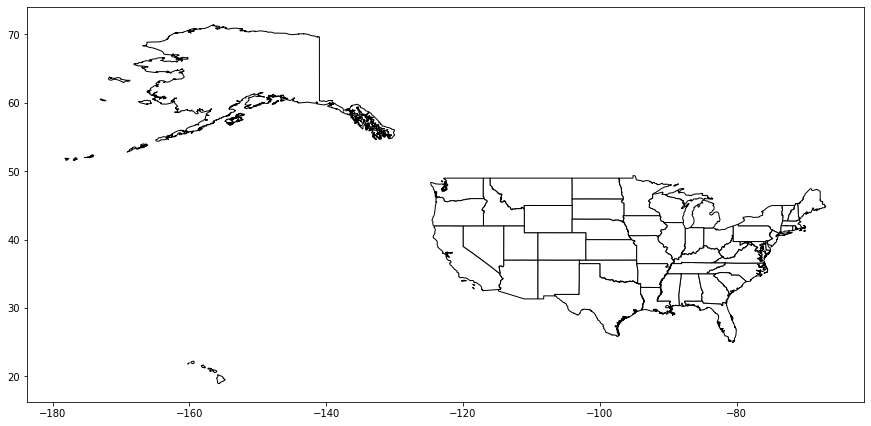

In [5]:
usa.plot(color='white', edgecolor='black')

You can check out individual states:

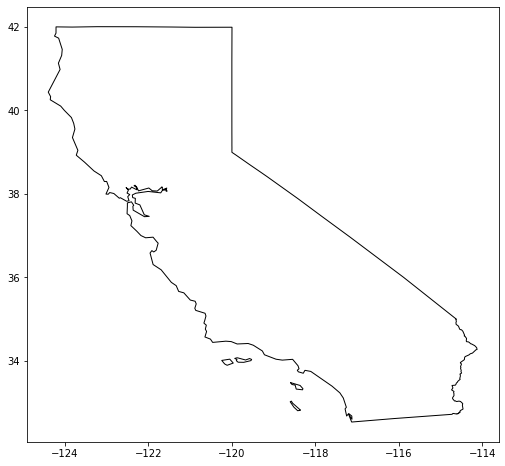

In [8]:
usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')

A ``GeoDataFrame`` needs a ``shapely`` object.

In [9]:
from shapely import wkt

We use the ``geo_sparql_query`` module to retrieve the collection of WKT we would like to plot.

In [10]:
from geo_sparql_query import get_local_gid_df, get_osm_df

In [62]:
INSPECTED_GID = 4

In [63]:
wkt_df = get_local_gid_df(INSPECTED_GID)

We use ``shapely.wkt`` sub-module to parse wkt format:

In [64]:
wkt_df['Coordinates'] = wkt_df['Coordinates'].apply(wkt.loads)

Lets inspected the ``GeoDataFrame``:

In [65]:
gdf = geopandas.GeoDataFrame(wkt_df, geometry='Coordinates')
gdf.insert(0, 'OSM', 0)

gdf.head()

,OSM,GID,Instance,Coordinates,Label,Types
0,0,http://linkedmaps.isi.edu/4,None,"MULTILINESTRING ((-105.23554 39.87583, -105.23...",None,None


We can plot our ``GeoDataFrame`` on top of a state:

In [66]:
#ax = usa[usa.STATE_ABBR == 'CA'].plot(color='white', edgecolor='black')
#gdf.plot(ax=ax, color='blue')
#plt.show()

Or as a standalone (no state borders):

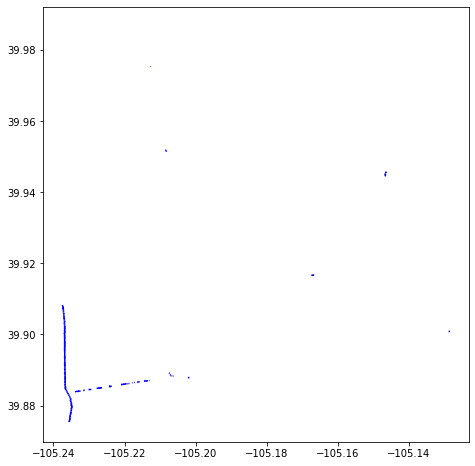

In [67]:
gdf.plot(color='blue')

In [68]:
osm_df = get_osm_df(INSPECTED_GID)

In [69]:
osm_df['Coordinates'] = osm_df['Coordinates'].apply(wkt.loads)
osm_gdf = geopandas.GeoDataFrame(osm_df, geometry='Coordinates')
osm_gdf.insert(0, 'OSM', 1)
osm_gdf.head()

,OSM,GID,Instance,Coordinates,Label,Types
0,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way17071151,"LINESTRING (-105.23511 39.88186, -105.23534 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
1,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way39723232,"LINESTRING (-105.23503 39.87889, -105.23501 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
2,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way99713559,"LINESTRING (-105.17018 39.94894, -105.17085 39...",Singletree Trail,http://geovocab.org/spatial#Feature http://lin...
3,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way39723233,"LINESTRING (-105.23501 39.87905, -105.23495 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
4,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way43007631,"LINESTRING (-105.12797 39.96975, -105.12816 39...",BNSF Front Range Subdivision,http://geovocab.org/spatial#Feature http://lin...


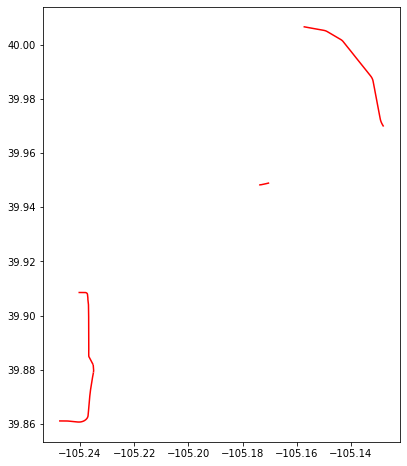

In [70]:
osm_gdf.plot(color='red')

In [71]:
frames = [gdf, osm_gdf]
result = pd.concat(frames)
result

,OSM,GID,Instance,Coordinates,Label,Types
0,0,http://linkedmaps.isi.edu/4,None,"MULTILINESTRING ((-105.23554 39.87583, -105.23...",None,None
0,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way17071151,"LINESTRING (-105.23511 39.88186, -105.23534 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
1,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way39723232,"LINESTRING (-105.23503 39.87889, -105.23501 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
2,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way99713559,"LINESTRING (-105.17018 39.94894, -105.17085 39...",Singletree Trail,http://geovocab.org/spatial#Feature http://lin...
3,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way39723233,"LINESTRING (-105.23501 39.87905, -105.23495 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...
4,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way43007631,"LINESTRING (-105.12797 39.96975, -105.12816 39...",BNSF Front Range Subdivision,http://geovocab.org/spatial#Feature http://lin...
5,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way43007679,"LINESTRING (-105.17384 39.94824, -105.17394 39...",SingleTree Trail,http://geovocab.org/spatial#Feature http://lin...
6,1,http://linkedmaps.isi.edu/4,http://linkedgeodata.org/triplify/way17071155,"LINESTRING (-105.24771 39.86114, -105.24737 39...",Rocky Flats Industrial Lead,http://geovocab.org/spatial#Feature http://lin...


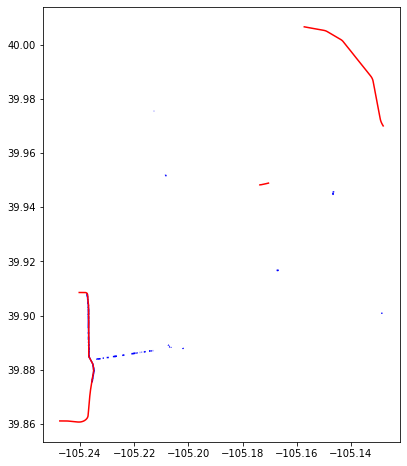

In [72]:
result.plot(column='OSM', cmap='bwr')

In [73]:
osm_gdf.to_excel("geolinking_results_g.xlsx") 

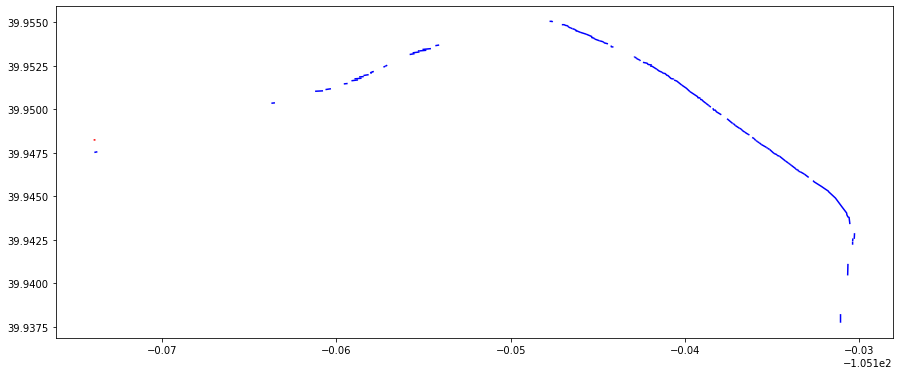

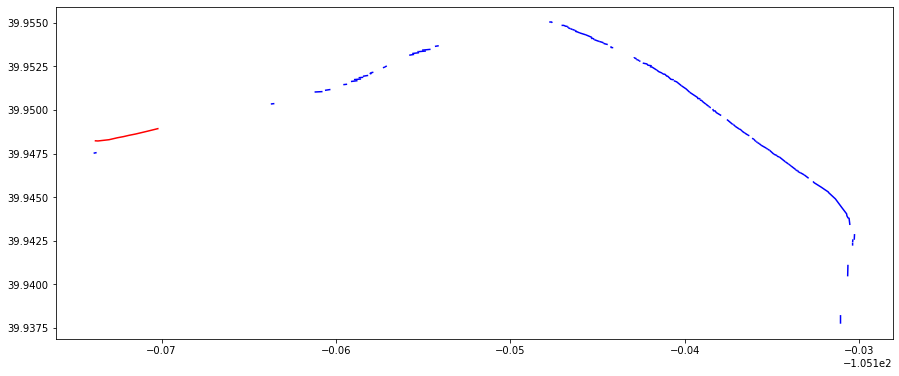

In [50]:
for idx in range(len(osm_gdf.index)):
    osm_inst_uri = osm_gdf.iloc[idx]['Instance']
    sub_osm_gdf = osm_gdf[osm_gdf.Instance == osm_inst_uri]
    frames = [gdf, sub_osm_gdf]
    result = pd.concat(frames)
    #print(sub_osm_gdf.iloc[0]['Types'])
    result.plot(column='OSM', cmap='bwr')